In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
%matplotlib inline

In [2]:
import GCRCatalogs

In [57]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
rcParams.update({'font.size': 14})

In [6]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/astropy/utils/introspection.py:147: UserWarning: Module GCRCatalogs was already imported from /global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/__init__.py, but /global/u2/j/jsanch87 is being added to sys.path
  from pkg_resources import parse_version


In [9]:
data = gc.get_quantities(['halo_mass', 'Mag_true_i_lsst_z0', 'mag_i', 'redshift', 'halo_id', 'isCentral'], filters=['mag_i < 24.5', 'redshift < 1.5'])

In [114]:
from scipy.stats import binned_statistic, binned_statistic_2d

In [13]:
data['isCentral'].dtype

dtype('bool')

In [14]:
central = data['isCentral']
sat = data['isCentral']==False

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


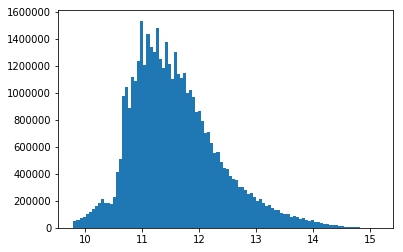

In [55]:
plt.hist(np.log10(data['halo_mass']), bins=100);

In [95]:
unique, inv, h_counts = np.unique(data['halo_id'][sat],return_inverse=True, return_counts=True)

In [100]:
len(unique)

4717258

In [97]:
unique[inv[sorted_id]]

array([        20307,         20347,         20347, ..., 8809200077137,
       8849000077137, 9123600085137])

In [92]:
data['halo_id'][sat][sorted_id]

array([        20307,         20347,         20347, ..., 8809200077137,
       8849000077137, 9123600085137])

In [111]:
mean_count, be, _ = binned_statistic(np.log10(data['halo_mass'][sat][sorted_id]), h_counts[inv[sorted_id]], statistic='mean', bins=30)
std_count, be, _ = binned_statistic(np.log10(data['halo_mass'][sat][sorted_id]), h_counts[inv[sorted_id]], statistic='std', bins=30)
ncount, be, _ = binned_statistic(np.log10(data['halo_mass'][sat][sorted_id]), h_counts[inv[sorted_id]], statistic='count', bins=30)

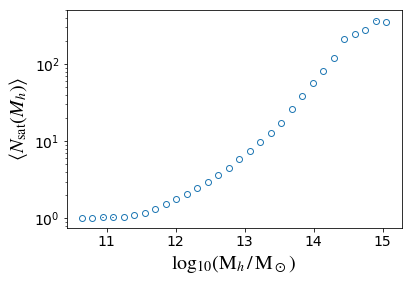

In [113]:
plt.errorbar(0.5*be[1:]+0.5*be[:-1], mean_count, std_count/np.sqrt(ncount),linestyle='none', fmt='o', fillstyle='none')
plt.xlabel(r'$\log_{10}\left({\rm M}_h \,/\, {\rm M}_\odot\right)$', fontsize=20)
plt.ylabel(r'$\langle N_{\rm sat}(M_{h}) \rangle$', fontsize=20)
plt.yscale('log')

In [125]:
z_edges = np.array([0.15, 0.50, 0.75, 1.0, 1.5])
m_edges = np.linspace(10.4,15.6,25)

In [126]:
mean_count, me, ze, _ = binned_statistic_2d(np.log10(data['halo_mass'][sat][sorted_id]), data['redshift'][sat][sorted_id], h_counts[inv[sorted_id]], statistic='mean', bins=[m_edges, z_edges])
std_count, me, ze, _ = binned_statistic_2d(np.log10(data['halo_mass'][sat][sorted_id]), data['redshift'][sat][sorted_id], h_counts[inv[sorted_id]], statistic='std', bins=[m_edges, z_edges])
ncount, me, ze, _ = binned_statistic_2d(np.log10(data['halo_mass'][sat][sorted_id]), data['redshift'][sat][sorted_id], h_counts[inv[sorted_id]], statistic='count', bins=[m_edges, z_edges])

In [120]:
me.shape

(31,)

In [ ]:
for i in range(mean_count.shape[1]):
    plt.errorbar(0.5*me[1:]+0.5*me[:-1], mean_count[:,i], std_count[:,i]/np.sqrt(ncount[:,i]),linestyle='none', fmt='o', fillstyle='none', label='%.2f < z < %.2f' % (ze[i], ze[i+1]))
plt.xlabel(r'$\log_{10}\left({\rm M}_h \,/\, {\rm M}_\odot\right)$', fontsize=20)
plt.ylabel(r'$\langle N_{\rm sat}(M_{h}) \rangle$', fontsize=20)
plt.yscale('log')
plt.legend(loc='best')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
